This is the run that we will use to choose the final model

OPTUNA_KSPLITS = 3  
OPTUNA_TRIALS = 40



In [ ]:
from src.evaluation import optimize_and_evaluate

res, hyperp = optimize_and_evaluate(['sgd', 'linear_svm'])

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Best trial: 21. Best value: 0.72: 100%|██████████| 40/40 [37:18<00:00, 55.97s/it]     


Beginning shapes: 
Xtr_val: (61316, 17) | X_test: (15330, 17) | ytr_val: (61316,) | y_test: (15330,)
Prep shapes: 
Xtr_val: (61316, 233588) | X_test: (15330, 233588) | ytr_val: (61316,) | y_test: (15330,)
sgd
{'aggregated': {'precision_macro': 0.7347154789181236, 'recall_macro': 0.7245443973220158, 'f1_macro': 0.7214238134348073}, 'per_class': {'precision': array([0.71378868, 0.74977857, 0.84451643, 0.7151608 , 0.80273834,
       0.66134185, 0.65568369]), 'recall': array([0.85651505, 0.82064954, 0.84140157, 0.50242066, 0.93946588,
       0.42750929, 0.6838488 ]), 'f1': array([0.7786656 , 0.7836149 , 0.84295612, 0.59020537, 0.86573694,
       0.51931761, 0.66947014]), 'support': array([4551, 2063, 2169, 1859, 1685, 2421,  582])}, 'confusion_matrix': array([[3898,  150,   49,  101,   51,  248,   54],
       [ 144, 1693,   84,   41,   25,   46,   30],
       [ 109,  122, 1825,   45,   16,   25,   27],
       [ 351,  116,  121,  934,  136,  164,   37],
       [  48,   15,    3,   15, 1583,

Best trial: 35. Best value: 0.719712: 100%|██████████| 40/40 [27:49<00:00, 41.74s/it] 


Beginning shapes: 
Xtr_val: (61316, 17) | X_test: (15330, 17) | ytr_val: (61316,) | y_test: (15330,)
Prep shapes: 
Xtr_val: (61316, 233588) | X_test: (15330, 233588) | ytr_val: (61316,) | y_test: (15330,)
linear_svm
{'aggregated': {'precision_macro': 0.7308534545851048, 'recall_macro': 0.7248465127186609, 'f1_macro': 0.723314595682954}, 'per_class': {'precision': array([0.72640245, 0.75514772, 0.8489777 , 0.68940493, 0.81308901,
       0.61684783, 0.66610455]), 'recall': array([0.83366293, 0.81774115, 0.84232365, 0.51102743, 0.92166172,
       0.46881454, 0.67869416]), 'f1': array([0.77634541, 0.78519898, 0.84563758, 0.58696324, 0.86397775,
       0.53273879, 0.67234043]), 'support': array([4551, 2063, 2169, 1859, 1685, 2421,  582])}, 'confusion_matrix': array([[3794,  150,   51,  110,   44,  354,   48],
       [ 135, 1687,   86,   43,   18,   66,   28],
       [  99,  119, 1827,   49,   15,   34,   26],
       [ 335,  109,  115,  950,  135,  179,   36],
       [  47,   15,    4,   31,

Best trial: 37. Best value: 0.720939:  95%|█████████▌| 38/40 [4:33:21<14:23, 431.62s/it]   


KeyboardInterrupt: 

In [ ]:
from src.evaluation import produce_submissions
big = True
include_title = True
hyperparams = {'C': 0.09831279820753532, 'max_iter': 5000, 'dual': True, 'random_state': 1000}
produce_submissions('linear_svm', big=True, include_title=True, output_filename='linear_svm.csv', hyperparams=hyperparams)

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Prediction saved in linear_svm.csv


,Id,Predicted
0,0,5
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
19995,19995,2
19996,19996,4
19997,19997,3
19998,19998,0


In [2]:
from src.evaluation import produce_submissions
big = True
include_title = True
hyperparams = {'loss': 'hinge', 'alpha': 7.921813306398083e-05, 'penalty': 'l2', 'learning_rate': 'optimal', 'eta0': 0.0019400597293188439, 'average': True, 'max_iter': 3000, 'tol': 4.318726932880404e-05, 'early_stopping': False, 'n_iter_no_change': 5, 'random_state': 1000}
produce_submissions('sgd', big=True, include_title=True, output_filename='sgd.csv', hyperparams=hyperparams)

Prediction saved in sgd.csv


,Id,Predicted
0,0,5
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
19995,19995,2
19996,19996,4
19997,19997,3
19998,19998,0


Results on public leaderboard:

- linear-svm: 0.729
- sgd: 0.727

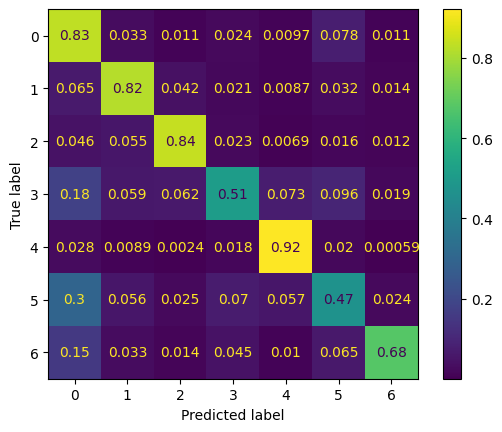

In [1]:
import numpy as np
from src.utils import plot_cm

plot_cm(cm=np.array([[3794,  150,   51,  110,   44,  354,   48],
       [ 135, 1687,   86,   43,   18,   66,   28],
       [  99,  119, 1827,   49,   15,   34,   26],
       [ 335,  109,  115,  950,  135,  179,   36],
       [  47,   15,    4,   31, 1553,   34,    1],
       [ 723,  135,   61,  169,  139, 1135,   59],
       [  90,   19,    8,   26,    6,   38,  395]]))